In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as lines

# General case

#### Enter parametrs

In [2]:
# M - состояния 
# K - возможные выборы 
# L - длина последовательности

print("Enter the number of states, M: ")
M = int(input())
print("Enter the number of possible emissions, K: ")
K = int(input())
print("Enter the length of the sequence, L: ")
L = int(input())

Enter the number of states, M: 
3
Enter the number of possible emissions, K: 
5
Enter the length of the sequence, L: 
400


#### Generate tab with data (and save them)

In [3]:
# Сгенерировать данные
transition_random = pd.DataFrame(np.random.randint(0,10,size=(M, M))).add_prefix('p').T.add_prefix('p').T
emission_random = pd.DataFrame(np.random.randint(0,10,size=(M, K))).add_prefix('e').T.add_prefix('p').T
beginning_distribution_random = pd.DataFrame(np.random.randint(1,10,size=(M, 1))).T.add_prefix('p').T

# Нормализовать данные
transition_norm = transition_random.div(transition_random.sum(axis=1),axis=0)
emission_norm = emission_random.div(emission_random.sum(axis=1),axis=0)
beginning_distribution_norm = beginning_distribution_random.div(beginning_distribution_random.sum(axis=0),axis=1)

# Сохранить данные
transition_norm.to_csv('transition.csv',sep='\t')
emission_norm.to_csv('emission.csv',sep='\t')
beginning_distribution_norm.to_csv('begin_distribution.csv',sep='\t')

### 1.1) Load data

In [4]:
transition = pd.read_csv('transition.csv',sep='\t',index_col=0)
emission = pd.read_csv('emission.csv',sep='\t',index_col=0)
begin_distribution = pd.read_csv('begin_distribution.csv',sep='\t',index_col=0)

In [5]:
transition

,p0,p1,p2
p0,0.125000,0.437500,0.437500
p1,0.466667,0.266667,0.266667
p2,0.333333,0.291667,0.375000


In [6]:
emission

,e0,e1,e2,e3,e4
p0,0.000000,0.277778,0.166667,0.333333,0.222222
p1,0.500000,0.055556,0.222222,0.055556,0.166667
p2,0.318182,0.045455,0.136364,0.181818,0.318182


In [7]:
begin_distribution

,0
p0,0.200000
p1,0.466667
p2,0.333333


### 1.2) HMM random generator:

In [8]:
def random_choice(distribution):
    rand = np.random.random() # равномероятно попадает в [0,1)
    rand = rand*distribution.sum() # равномероятно попадает в [0,dist_sum)
    position = 0 
    for i in range(len(distribution)):
        position += distribution[i]
        # position = правая граница интервала i-го интервала, размер которого пропорционален i-ой вероятности
        if rand < position: # rand попал в интервал для i-ой вероятности
            return i
        
def HMMrg_path(begin_dist,transition,Length):
    path = []
    path.append('p'+str(random_choice(begin_dist['0'])))
    for i in range(1,Length):
        path.append('p'+str(random_choice(transition.T[path[i-1]])))
    return path

def HMMrg_sequence(path,emission,Length):
    sequence = []
    for i in range(Length): 
        sequence.append('e'+str(random_choice(emission.T[path[i]])))
    return sequence

In [9]:
# Сгенерировать последовательности
path_random = HMMrg_path(begin_distribution,transition,L)
sequence_random = HMMrg_sequence(path_random,emission,L)

# Сохранить данные
path_random_df = pd.DataFrame({'path': path_random})
path_random_df.to_csv('Path.csv',sep='\t')
sequence_random_df = pd.DataFrame({'sequence': sequence_random})
sequence_random_df.to_csv('Emissions.csv',sep='\t')

# Загрузить данные
path = pd.read_csv('Path.csv',sep='\t',index_col=0)
sequence = pd.read_csv('Emissions.csv',sep='\t',index_col=0)

In [10]:
#Функции, упрощающие визуальное восприятие кода при выводе массивов на экран

def print_path(p):
    print("    Path (states, Pi): ")
    for element in p['path']:
        print(element + '  ', end='')
        
def print_emissions(e):
    print("\n\n    Emissions (sequence of observation, x): ")
    for element in e['sequence']:
        print(element + '  ', end='')
        
def print_recovered_path(rp):
    print("\n\n    Recovered path (states, Pi): ")
    for i in range(len(rp)):
        print(rp[i] + '  ', end='')

def print_recovered_path_log(rpl):
    print("\n\n    Recovered path using logarithm (states, Pi): ")
    for i in range(len(rpl)):
        print(rpl[i] + '  ', end='')

In [11]:
print_path(path)
print_emissions(sequence)

    Path (states, Pi): 
p1  p0  p2  p0  p1  p1  p1  p0  p1  p0  p2  p2  p2  p1  p1  p1  p2  p2  p0  p2  p2  p2  p0  p2  p1  p2  p0  p2  p0  p2  p1  p0  p1  p0  p2  p1  p1  p2  p1  p2  p2  p0  p2  p0  p1  p2  p1  p1  p0  p2  p1  p1  p1  p1  p0  p1  p0  p2  p0  p2  p0  p1  p0  p2  p2  p2  p2  p0  p2  p0  p0  p1  p2  p1  p0  p1  p2  p2  p2  p1  p2  p1  p0  p1  p0  p2  p0  p1  p0  p1  p2  p0  p0  p2  p1  p0  p0  p2  p0  p0  p0  p2  p1  p0  p2  p0  p1  p1  p0  p1  p1  p0  p2  p1  p0  p2  p0  p2  p0  p0  p1  p0  p2  p2  p1  p0  p2  p2  p1  p0  p2  p0  p2  p1  p2  p2  p2  p2  p1  p0  p2  p2  p0  p1  p0  p1  p0  p0  p1  p0  p2  p1  p2  p0  p2  p0  p1  p2  p2  p2  p0  p2  p2  p0  p2  p0  p2  p2  p2  p1  p0  p0  p1  p0  p2  p0  p1  p0  p1  p0  p1  p0  p2  p2  p2  p1  p0  p1  p0  p1  p1  p1  p1  p0  p2  p2  p1  p2  p0  p0  p1  p2  p1  p2  p2  p2  p2  p0  p1  p2  p2  p2  p0  p1  p0  p1  p2  p1  p0  p2  p1  p2  p2  p2  p0  p1  p1  p0  p1  p1  p2  p0  p1  p0  p1  p0  p1  p0  p1  p2  p1  p1  p2  p2  

### 1.3) Viterbi algorithm

In [12]:
def viterbi_algorithm(A,B,pi,seq):
    L = len(seq)
    M = len(A)
    
    #Initialization
    Matr_value = pd.DataFrame(np.zeros((M,L+1)),index=A.index)
    Matr_value[0]=pi['0']
    Matr_index = pd.DataFrame(np.zeros((M,L+1)),index=A.index)
    
    #Recursion
    for k in Matr_value.columns[1:]:
        for i in Matr_value.index:
            values = []
            for j in Matr_value.index:
                values.append(Matr_value[k-1][j] * A[i][j])
            max_value = values[0]
            max_index = 0
            for ind, val in enumerate(values):
                if val>max_value:
                    max_value = val
                    max_index = ind
            Matr_value[k][i] = B[seq['sequence'][k-1]][i] * max_value
            Matr_index[k][i] = max_index
    
    #Traceback      
    path = []
    idx = Matr_value[L].idxmax(axis=0)
    path = [idx]+path
    k = 'p'+str(Matr_index[L][idx]).split('.')[0]
    path = [k] + path 
    for i in range(L-1,1,-1):
        k = 'p'+ str(Matr_index[i][k]).split('.')[0]
        path = [k] + path
    return path

In [13]:
def log_matr(Matr):
    rows=len(Matr.index)
    columns=len(Matr.columns)
    log_Matr = pd.DataFrame([[-1000000000.0 for i in range(columns)] for j in range(rows)],index=Matr.index, columns=Matr.columns)
    for i in Matr.columns:
        for j in Matr.index:
            if Matr[i][j] != 0:
                log_Matr[i][j] = math.log(Matr[i][j])
    return log_Matr

def viterbi_algorithm_log(A,B,pi,seq):
    L = len(seq)
    M = len(A)
    A_log = log_matr(A)
    B_log = log_matr(B)
    pi_log = log_matr(pi)
    
    #Initialization
    Matr_value = pd.DataFrame(np.zeros((M,L+1)),index=A.index)
    Matr_value[0]=pi_log['0']
    Matr_index = pd.DataFrame(np.zeros((M,L+1)),index=A.index)
    
    #Recursion
    for k in Matr_value.columns[1:]:
        for i in Matr_value.index:
            values = []
            for j in Matr_value.index:
                values.append(Matr_value[k-1][j] + A_log[i][j])
            max_value = values[0]
            max_index = 0
            for ind, val in enumerate(values):
                if val>max_value:
                    max_value = val
                    max_index = ind
            Matr_value[k][i] = B_log[seq['sequence'][k-1]][i] + max_value
            Matr_index[k][i] = max_index
    
    #Traceback
    path = []
    idx = Matr_value[L].idxmax(axis=0)
    path = [idx]+path
    k = 'p'+str(Matr_index[L][idx]).split('.')[0]
    path = [k] + path 
    for i in range(L-1,1,-1):
        k = 'p'+ str(Matr_index[i][k]).split('.')[0]
        path = [k] + path
    return path

In [14]:
#Воссоздание последовательности
recovered_path = viterbi_algorithm(transition,emission,begin_distribution,sequence)
#Воссоздание последовательности в логарифмическом пространстве
recovered_path_log = viterbi_algorithm_log(transition,emission,begin_distribution,sequence)

In [15]:
print_path(path)
print_recovered_path(recovered_path)
print_recovered_path_log(recovered_path_log)

    Path (states, Pi): 
p1  p0  p2  p0  p1  p1  p1  p0  p1  p0  p2  p2  p2  p1  p1  p1  p2  p2  p0  p2  p2  p2  p0  p2  p1  p2  p0  p2  p0  p2  p1  p0  p1  p0  p2  p1  p1  p2  p1  p2  p2  p0  p2  p0  p1  p2  p1  p1  p0  p2  p1  p1  p1  p1  p0  p1  p0  p2  p0  p2  p0  p1  p0  p2  p2  p2  p2  p0  p2  p0  p0  p1  p2  p1  p0  p1  p2  p2  p2  p1  p2  p1  p0  p1  p0  p2  p0  p1  p0  p1  p2  p0  p0  p2  p1  p0  p0  p2  p0  p0  p0  p2  p1  p0  p2  p0  p1  p1  p0  p1  p1  p0  p2  p1  p0  p2  p0  p2  p0  p0  p1  p0  p2  p2  p1  p0  p2  p2  p1  p0  p2  p0  p2  p1  p2  p2  p2  p2  p1  p0  p2  p2  p0  p1  p0  p1  p0  p0  p1  p0  p2  p1  p2  p0  p2  p0  p1  p2  p2  p2  p0  p2  p2  p0  p2  p0  p2  p2  p2  p1  p0  p0  p1  p0  p2  p0  p1  p0  p1  p0  p1  p0  p2  p2  p2  p1  p0  p1  p0  p1  p1  p1  p1  p0  p2  p2  p1  p2  p0  p0  p1  p2  p1  p2  p2  p2  p2  p0  p1  p2  p2  p2  p0  p1  p0  p1  p2  p1  p0  p2  p1  p2  p2  p2  p0  p1  p1  p0  p1  p1  p2  p0  p1  p0  p1  p0  p1  p0  p1  p2  p1  p1  p2  p2  

In [16]:
#Функции, упрощающие визуальное восприятие кода при анализе восстановленных последовательностей

def print_vitberi_analysis(p,rp,rpl):
    print("\n\n       VITERBI analysis of results:")

    L_p = len(p)
    success = 0
    for i in range(L_p):
        if rp[i] == p['path'][i]:
            success+=1
    print("NO   logarithm: Right recovers: ", success, " (out of ", L_p, ")")
    
    success_log = 0
    for i in range(L_p):
        if rpl[i] == p['path'][i]:
            success_log+=1
    print("WITH logarithm: Right recovers: ", success_log, " (out of ", L_p, ")")

    difference = 0
    for i in range(L_p):
        if rpl[i] != rp[i]:
            difference+=1
    print("   NO vs  WITH: Differences:    ", difference, "  (out of ", L_p, ")")

In [17]:
print_vitberi_analysis(path,recovered_path,recovered_path_log)



       VITERBI analysis of results:
NO   logarithm: Right recovers:  214  (out of  400 )
WITH logarithm: Right recovers:  231  (out of  400 )
   NO vs  WITH: Differences:     34   (out of  400 )


### 1.4) Forward algorithm

In [18]:
def forward_algorithm(A,B,pi,seq):
    L = len(seq)
    M = len(A)
    
    #Initialisation
    F = np.zeros((L,M))
    F[0] = pi['0'] * B[seq['sequence'][0]]
    
    #Recursion
    for i in range(1, L):
        temp = np.zeros(M)
        for k in range(M):
            temp += F[i-1, k] * A.T['p'+str(k)]
        F[i] = B[seq['sequence'][i]] * temp
            
    #Termination
    P = F[L-1].sum()
    
    return pd.DataFrame(F).add_prefix('p').T, P

In [19]:
def sum_log_vec(A,B):
    Sum_log = np.zeros(len(A))
    for i in range(len(A)):
        if A[i] == 0 or B[i] == 0:
            if A[i] == 0:
                Sum_log[i] = B[i]
            elif B == 0:
                Sum_log[i] = A[i]
        else:
            if A[i] > B[i]:
                Sum_log[i] = A[i] + np.log(1 + np.exp(B[i] - A[i]))
            if A[i] < B[i]:
                Sum_log[i] = B[i] + np.log(1 + np.exp(A[i] - B[i]))
    return Sum_log

def sum_log_val(A,B):
    if A == 0 or B == 0:
        if A == 0:
            return B
        elif B == 0:
            return A
    else:
        if A > B:
            return A + np.log(1 + np.exp(B - A))
        if A < B:
            return B + np.log(1 + np.exp(A - B))

def forward_algorithm_log(A,B,pi,seq):
    L = len(seq)
    M = len(A)
    A_log = log_matr(A)
    B_log = log_matr(B)
    pi_log = log_matr(pi)
    
    #Initialisation
    F = np.zeros((L,M))
    F[0] = pi_log['0'] + B_log[seq['sequence'][0]]
    
    #Recursion
    for i in range(1, L):
        temp = np.zeros(M)
        for k in range(M):
            temp = sum_log_vec(temp, F[i-1, k] + A_log.T['p'+str(k)])
        F[i] = B_log[seq['sequence'][i]] + temp
        
    #Termination
    P = 0
    for k in range(M):
        P = sum_log_val(P, F[L-1, k])
    
    return pd.DataFrame(F).add_prefix('p').T, P

In [20]:
F_Matrix, F_P = forward_algorithm(transition,emission,begin_distribution,sequence)
print('Forward algorithm. Sequence Probability (without logarithm): \n', F_P)
F_Matrix_log, F_P_log = forward_algorithm_log(transition,emission,begin_distribution,sequence)
print('Forward algorithm. Sequence Probability (using logarithm): \n', F_P_log)

Forward algorithm. Sequence Probability (without logarithm): 
 1.39233158888e-274
Forward algorithm. Sequence Probability (using logarithm): 
 -630.577335736


### 1.5) Backward algorithm

In [21]:
def backward_algorithm(A,B,pi,seq):
    L = len(seq)
    M = len(A)
        
    #Initialisation
    F = np.zeros((L,M))
    for i in range(M):
        F[L - 1,i] = 1
        
    #Recursion
    for i in range(L - 2, -1, -1):
        for l in range(M):
            F[i] += A['p'+str(l)] * B.T['p'+str(l)][str(seq['sequence'][i+1])] * F[i+1, l]
            
    #Termination
    P = 0
    for l in range(M):
        P += pi['0'][l] * B.T['p'+str(l)][str(seq['sequence'][0])] * F[0, l]
    return pd.DataFrame(F).add_prefix('p').T, P

In [22]:
def backward_algorithm_log(A,B,pi,seq):
    L = len(seq)
    M = len(A)
    A_log = log_matr(A)
    B_log = log_matr(B)
    pi_log = log_matr(pi)
        
    #Initialisation
    F = np.zeros((L,M))
    for i in range(M):
        F[L - 1,i] = np.log(1)
        
    #Recursion
    for i in range(L - 2, -1, -1):
        for l in range(M):
            F[i] = sum_log_vec(F[i], A_log['p'+str(l)] + B_log.T['p'+str(l)][str(seq['sequence'][i+1])] + F[i+1, l])
            
    #Termination
    P = 0
    for l in range(M):
        P = sum_log_val(P, pi_log['0'][l] + B_log.T['p'+str(l)][str(seq['sequence'][0])] + F[0, l])
    return pd.DataFrame(F).add_prefix('p').T, P

In [23]:
B_Matrix, B_P = backward_algorithm(transition,emission,begin_distribution,sequence)
print('Backward algorithm. Sequence Probability (without logarithm): \n', B_P)
B_Matrix_log, B_P_log = backward_algorithm_log(transition,emission,begin_distribution,sequence)
print('Backward algorithm. Sequence Probability (using logarithm): \n', B_P_log)

Backward algorithm. Sequence Probability (without logarithm): 
 1.39233158888e-274
Backward algorithm. Sequence Probability (using logarithm): 
 -630.577335736


### 1.6) Posterior decoding

In [24]:
def posterior_decoding(F, B, P):
    L = len(F.T)
    posterior = []
    for i in range(L):
        posterior.append(F[i][0] * B[i][0] / P)
    return posterior

In [25]:
    #Используем то, что было расчитанно ранее:
#F_Matrix, F_P = forward_algorithm(transition,emission,begin_distribution,sequence)
#B_Matrix, B_P = backward_algorithm(transition,emission,begin_distribution,sequence)

post = posterior_decoding(F_Matrix, B_Matrix, F_P)

# UC - Unfair Casino

Begin distribution: 
1. 2/3
2. 1/3

Transition: The die thrower likes to keep in one state (fair/biased), and the tranisition from 
1. Fair-> Fair : .95
2. Fair->Biased: 1-.95=.05
3. Biased->Biased: .90
4. Biased->Biased=1-.90=.10

Emission: 
1. The fair die -> Pr(1)=Pr(2)=Pr(3)=Pr(4)=Pr(5)=Pr(5)=1/6
2. The biased die -> Pr(1)=Pr(2)=Pr(3)=Pr(4)=Pr(5)=0.1 and Pr(6)=0.5

### 2.1) UC generation

In [26]:
print("Enter the length of the sequence, L: ")
L_UC = int(input())

Enter the length of the sequence, L: 
200


In [27]:
# Создать матрицы
Unfair_casino_transition = pd.DataFrame(np.array([[.95,.05],[.1,.9]])).add_prefix('p').T.add_prefix('p').T
Unfair_casino_emission = pd.DataFrame(np.array([[1.0/6 for i in range(6)],[.1,.1,.1,.1,.1,.5]])).add_prefix('e').T.add_prefix('p').T
Unfair_casino_beginning_distribution = pd.DataFrame(np.array([2.0/3,1.0/3])).T.add_prefix('p').T

# Сохранить данные
Unfair_casino_transition.to_csv('transition.csv',sep='\t')
Unfair_casino_emission.to_csv('emission.csv',sep='\t')
Unfair_casino_beginning_distribution.to_csv('begin_distribution.csv',sep='\t')

# Загрузить данные
transition_UC = pd.read_csv('transition.csv',sep='\t',index_col=0)
emission_UC = pd.read_csv('emission.csv',sep='\t',index_col=0)
begin_distribution_UC = pd.read_csv('begin_distribution.csv',sep='\t',index_col=0)

In [28]:
transition_UC

,p0,p1
p0,0.95,0.05
p1,0.10,0.90


In [29]:
emission_UC

,e0,e1,e2,e3,e4,e5
p0,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
p1,0.100000,0.100000,0.100000,0.100000,0.100000,0.500000


In [30]:
begin_distribution_UC

,0
p0,0.666667
p1,0.333333


In [31]:
# Сгенерировать последовательности
path_random_UC = HMMrg_path(begin_distribution_UC,transition_UC,L_UC)
sequence_random_UC = HMMrg_sequence(path_random_UC,emission_UC,L_UC)

# Сохранить последовательности
path_random_UC_df = pd.DataFrame({'path': path_random_UC})
path_random_UC_df.to_csv('Path_UC.csv',sep='\t')
sequence_random_UC_df = pd.DataFrame({'sequence': sequence_random_UC})
sequence_random_UC_df.to_csv('Emissions_UC.csv',sep='\t')

# Загрузить последовательности
path_UC = pd.read_csv('Path_UC.csv',sep='\t',index_col=0)
sequence_UC = pd.read_csv('Emissions_UC.csv',sep='\t',index_col=0)

In [32]:
print_path(path_UC)
print_emissions(sequence_UC)

    Path (states, Pi): 
p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  

    Emissions (sequence of observation, x): 
e2  e3  e5  e1  e4  e2  e3  e0  e3  e1  e3  e2  e0  e4  e5  e5  e5  e5  e0  e4  e3  e5  e2  e2  e5  e2  e2  e4  e4  e5  e4  e0  e

### 2.2) Viterbi algorithm

In [33]:
# Восстановить последовательность состояний (алгоритм ВИТЕРБИ)
recovered_path_UC = viterbi_algorithm(transition_UC,emission_UC,begin_distribution_UC,sequence_UC)
# Восстановить последовательность состояний (алгоритм ВИТЕРБИ в логарифмическом пространстве)
recovered_path_UC_log = viterbi_algorithm_log(transition_UC,emission_UC,begin_distribution_UC,sequence_UC)

In [34]:
print_recovered_path(recovered_path_UC)
print_recovered_path_log(recovered_path_UC_log)



    Recovered path (states, Pi): 
p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  p1  

    Recovered path using logarithm (states, Pi): 
p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  p0  

In [35]:
# Сравнить восстановленные последовательности
print_vitberi_analysis(path_UC,recovered_path_UC,recovered_path_UC_log)



       VITERBI analysis of results:
NO   logarithm: Right recovers:  131  (out of  200 )
WITH logarithm: Right recovers:  131  (out of  200 )
   NO vs  WITH: Differences:     0   (out of  200 )


#### Forward algorithm

In [36]:
F_Matrix_UC, F_P_UC = forward_algorithm(transition_UC,emission_UC,begin_distribution_UC,sequence_UC)
print('Forward algorithm. Sequence Probability (without logarithm): \n', F_P_UC)
F_Matrix_UC_log, F_P_UC_log = forward_algorithm_log(transition_UC,emission_UC,begin_distribution_UC,sequence_UC)
print('Forward algorithm. Sequence Probability (using logarithm): \n', F_P_UC_log)

Forward algorithm. Sequence Probability (without logarithm): 
 6.78347779799e-150
Forward algorithm. Sequence Probability (using logarithm): 
 -343.473274029


#### Backward algorithm

In [37]:
B_Matrix_UC, B_P_UC = backward_algorithm(transition_UC,emission_UC,begin_distribution_UC,sequence_UC)
print('Backward algorithm. Sequence Probability (without logarithm): \n', B_P_UC)
B_Matrix_UC_log, B_P_UC_log = backward_algorithm_log(transition_UC,emission_UC,begin_distribution_UC,sequence_UC)
print('Backward algorithm. Sequence Probability (using logarithm): \n', B_P_UC_log)

Backward algorithm. Sequence Probability (without logarithm): 
 6.78347779799e-150
Backward algorithm. Sequence Probability (using logarithm): 
 -343.473274029


### 2.3) Posterior probability

#### Posterior decoing

In [38]:
post_UC = posterior_decoding(F_Matrix_UC, B_Matrix_UC, F_P_UC)

In [39]:
# This function shows the plot, where posterior probability is compared to the
# regions of the path (where fair or unfair dice was used).

def plot_dice_posterior_probability(
    path, 
    posterior_probability_path, 
    green_state = 0,
    green_label = 'Fair dice',
    red_label = 'Unfair dice',
    line_label='Probability of fair dice',
    alpha=0.2):
    
    L = len(path['path'])
    state_path = np.zeros(L)
    for i in range(L):
        state_path[i] = path['path'][i][1]
    
    cur_color = state_path[0]
    start = 0
    
    for i in range(1, len(state_path)):
        if state_path[i] == cur_color:
            continue
        else:
            if cur_color == green_state:
                plt.axvspan(start, i, facecolor = 'green', alpha = alpha)
            else:
                plt.axvspan(start, i, facecolor = 'red', alpha = alpha)
            start = i
            cur_color = state_path[i]
    
    if state_path[-1] == 0:
        plt.axvspan(start, len(state_path) - 1, facecolor = 'green', alpha = alpha)
    else:
        plt.axvspan(start, len(state_path) - 1, facecolor = 'red', alpha = alpha)

    plt.plot(posterior_probability_path, color = 'blue')
    
    green_path = mpatches.Patch(color='green', alpha = alpha, label = green_label)
    red_path = mpatches.Patch(color='red', alpha = alpha, label = red_label)
    blue_line = lines.Line2D([],[], color = 'blue', label = line_label)
    
    plt.legend(
        handles = [green_path, red_path, blue_line],
        bbox_to_anchor = (0., 1.02, 1., .102), loc = 3,
        ncol = 1, mode = 'expand', borderaxespad = 0.)
    
    plt.show()

#### PLOT: Posterior Probability combared with the Simulated Path

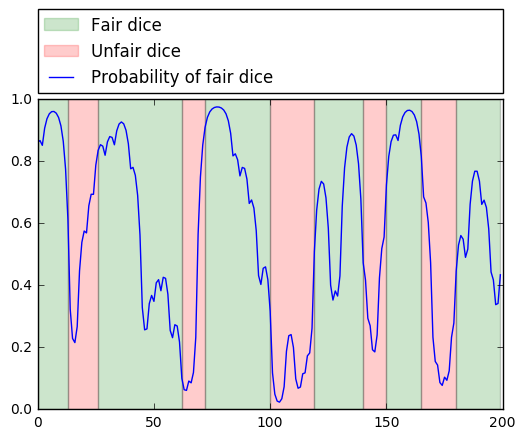

In [40]:
plot_dice_posterior_probability(path_UC, post_UC)

#### PLOT: Posterior Probability combared with the Recovered Path

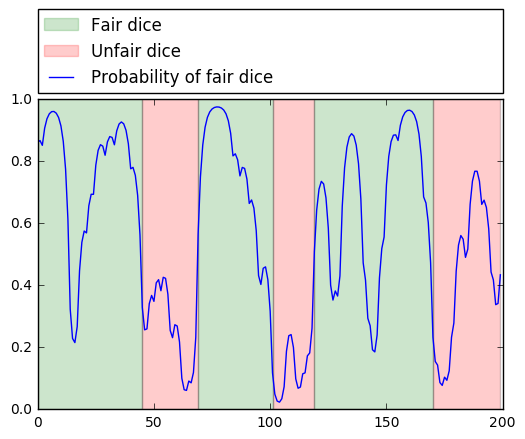

In [41]:
plot_dice_posterior_probability(pd.DataFrame({'path': recovered_path_UC_log}), post_UC)

# Algorithm Checking

Дополнительное задание из прошлого письма:
1. Нужно сгенерировать 1000 случайных последовательностей (за основу берётся нечестное казино из второй части домашнего задания). 
2. Посчитать для них вероятность при помощи алгоритма прямого хода (получаю оценку распределения вероятностей на последовательностях)
3. Посчитайть процент последовательностей, вероятность которых меньше, чем вероятность исходной последовательности (за исходную беру ту, что сгенерированна выше для нечестного казино из второй части домашнего задания)

In [42]:
total = 1000
exception = 0

for i in range(total):
    sequence_random_UC = HMMrg_sequence(path_random_UC,emission_UC,L_UC)
    sequence_random_UC_df = pd.DataFrame({'sequence': sequence_random_UC})
    Matrix, P = forward_algorithm_log(transition_UC,emission_UC,begin_distribution_UC,sequence_random_UC_df)
    if (P < F_P_UC_log):
        exception+=1

print("There are ", 100*exception/total ,"% sequences, that's probabilities are lower, then the original one.")

There are  85.7 % sequences, that's probabilities are lower, then the original one.


Результат не выходит за рамки: < 5% или > 95% - значит с некоторым допущением можно сказать, что алгоритмы работают правильно :D

# UC example from Danilova

Дополнительное задание из прошлого письма: сверил работу алгоритмов с Екатериной Даниловой, на примере её исходных данных.

In [43]:
lines_danilova = ['315116246446644245311321631164',
                  'FFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
                  '152133625144543631656626566666',
                  'FFFFFFFFFFFFFFFLLLLLLLLLLLLLLL',
                  '651166453132651245636664631636',
                  'LLLLLLFFFFFFFFFFFFLLLLLLLLLLLL',
                  '663162326455236266666625151631',
                  'LLLLFFFLLLLLLLLLLLLLLFFFFFFFFF',
                  '222555441666566563564324364131',
                  'FFFFFFFFLLLLLLLLLLLLLFFFFFFFFF',
                  '513465146353411126414626253356',
                  'FFFFFFFFFFFFFFFFFFFFFFFFFFFFLL',
                  '366163666466232534413661661163',
                  'LLLLLLLLFFFFFFFFFFFFFFFFFFFFFF',
                  '252562462255265252266435353336',
                  'FFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
                  '233121625364414432335163243633',
                  'FFFFFFFFFFFFFFFFFFFFFFFFFFFLLL',
                  '665562466662632666612355245242',
                  'LLLLLLLLLLLLLLLLLLLFFFFFFFFFFF']
observation_lines = [line for i, line in enumerate(lines_danilova) if i%2 == 0]
observations = [int(x) for x in ''.join(observation_lines)]
estimate_lines = [line for i, line in enumerate(lines_danilova) if i%2 == 1]
estimates = [0 if x == 'F' else 1 for x in ''.join(estimate_lines)]

L_danilova = len(observations)
print('Длина последовательности: ',L_danilova)

path_danilova = []
for i in range(L_danilova):
    path_danilova.append('p'+str(estimates[i]))
path_danilova = pd.DataFrame({'path': path_danilova})

sequence_danilova = []
for i in range(L_danilova):
    sequence_danilova.append('e'+str(observations[i]-1))
sequence_danilova = pd.DataFrame({'sequence': sequence_danilova})

Длина последовательности:  300


In [44]:
#print_path(path_danilova)
#print_emissions(sequence_danilova)

#### Viterbi algorithm

In [45]:
# Восстановить последовательность состояний (алгоритм ВИТЕРБИ)
recovered_path_danilova = viterbi_algorithm(transition_UC,emission_UC,begin_distribution_UC,sequence_danilova)
# Восстановить последовательность состояний (алгоритм ВИТЕРБИ используя логорифм)
recovered_path_danilova_log = viterbi_algorithm_log(transition_UC,emission_UC,begin_distribution_UC,sequence_danilova)

In [46]:
#print_recovered_path(recovered_path_danilova)
#print_recovered_path_log(recovered_path_danilova_log)

# Сравнить восстановленные последовательности
print_vitberi_analysis(path_danilova,recovered_path_danilova,recovered_path_danilova_log)



       VITERBI analysis of results:
NO   logarithm: Right recovers:  272  (out of  300 )
WITH logarithm: Right recovers:  272  (out of  300 )
   NO vs  WITH: Differences:     0   (out of  300 )


Результаты совпали

#### Forward algorithm

In [47]:
F_Matrix_danilova, F_P_danilova = forward_algorithm(transition_UC,emission_UC,begin_distribution_UC,sequence_danilova)
print('Forward algorithm. Sequence Probability (without logarithm): \n', F_P_danilova)
F_Matrix_danilova_log, F_P_danilova_log = forward_algorithm_log(transition_UC,emission_UC,begin_distribution_UC,sequence_danilova)
print('Forward algorithm. Sequence Probability (using logarithm): \n', F_P_danilova_log)

Forward algorithm. Sequence Probability (without logarithm): 
 3.8266688037e-225
Forward algorithm. Sequence Probability (using logarithm): 
 -516.739651263


Результаты совпали

#### Backward algorithm

In [48]:
B_Matrix_danilova, B_P_danilova = backward_algorithm(transition_UC,emission_UC,begin_distribution_UC,sequence_danilova)
print('Backward algorithm. Sequence Probability (without logarithm): \n', B_P_danilova)
B_Matrix_danilova_log, B_P_danilova_log = backward_algorithm_log(transition_UC,emission_UC,begin_distribution_UC,sequence_danilova)
print('Backward algorithm. Sequence Probability (using logarithm): \n', B_P_danilova_log)

Backward algorithm. Sequence Probability (without logarithm): 
 3.8266688037e-225
Backward algorithm. Sequence Probability (using logarithm): 
 -516.739651263


Результаты совпали

#### Posterior decoing

In [49]:
post_danilova = posterior_decoding(F_Matrix_danilova, B_Matrix_danilova, F_P_danilova)

#### PLOT: Posterior Probability combared with the Simulated Path

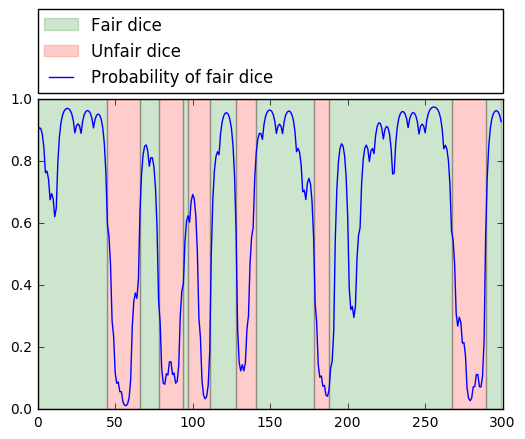

In [50]:
plot_dice_posterior_probability(path_danilova, post_danilova)

#### PLOT: Posterior Probability combared with the Recovered Path

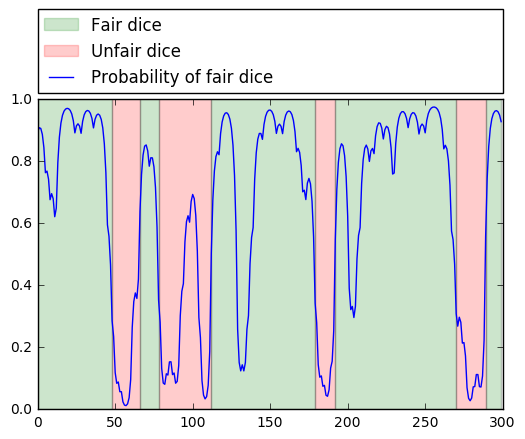

In [51]:
plot_dice_posterior_probability(pd.DataFrame({'path': recovered_path_danilova_log}), post_danilova)